# imports

In [1]:
import sys
sys.path.append('../src/')

from collections import OrderedDict
import torch

from data import get_loader
from filters import kalman_filter
from models import CNN
from utils import draw_weights, init_model, plot_density, plot_training, validate

# config

In [2]:
batch_size = 256
dataset = 'mnist'
epochs = 20
learning_rate = 1e-1
log_intv = 50
init = 'uniform'

device = torch.device('cuda:0')

# dataloader and model

In [3]:
trainloader = get_loader(dataset, batch_size, train=True)
testloader = get_loader(dataset, batch_size, train=False)

model = CNN().to(device)
init_model(model, init=init)

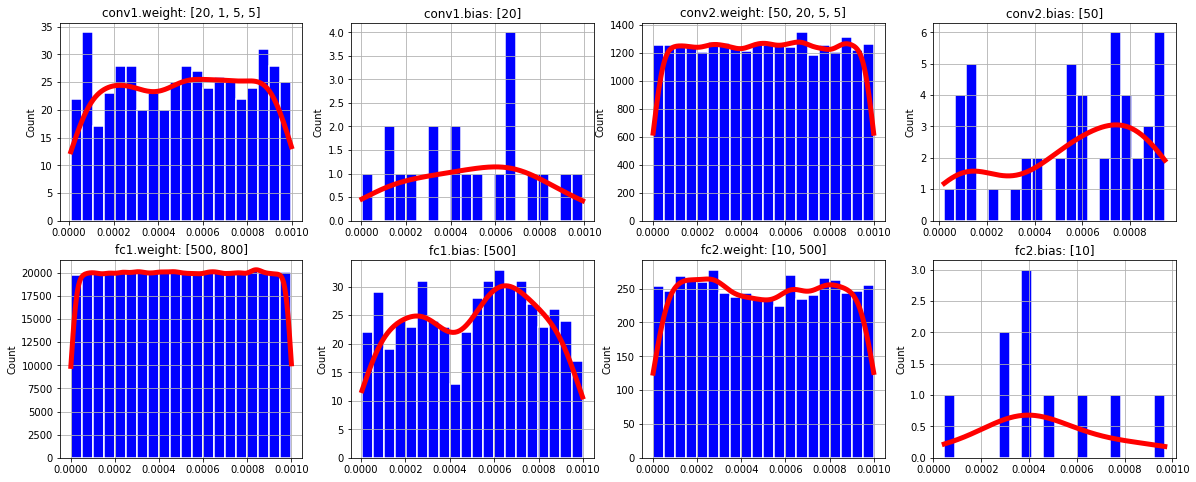

In [4]:
plot_density(model, bins=20)

# training

In [5]:
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss().to(device)

- $\mu_k(0)$ and $\sigma_k(0)$ is initialized for the model
- Also, initialize estimate covariances $P_{\mu}(0)$ and $P_{\sigma}(0)$
- Initialize small values of $\sigma_{\mu}$, $\tilde{\sigma}_{\mu}$, $\sigma_{\sigma}$, $\tilde{\sigma}_{\sigma}$

In [6]:
std_mu = 1e-1
std_mu_ = 1e-1
std_var = 1e-1
std_var_ = 1e-1

In [7]:
model_mu = OrderedDict()
model_var = OrderedDict()
P_mu = OrderedDict()
P_var = OrderedDict()

for name, param in model.named_parameters():
    model_mu[name] = torch.zeros(param.size())
    model_var[name] = torch.ones(param.size())*(0.01**2)
    
    P_mu[name] = torch.zeros(param.size())
    P_var[name] = torch.zeros(param.size())

[epoch:   1, batch:    0] loss: 2.302605 	 acc: 0.07
[epoch:   1, batch:   50] loss: 2.302291 	 acc: 0.11
[epoch:   1, batch:  100] loss: 2.301442 	 acc: 0.11
[epoch:   1, batch:  150] loss: 2.301482 	 acc: 0.11
[epoch:   1, batch:  200] loss: 2.301283 	 acc: 0.11


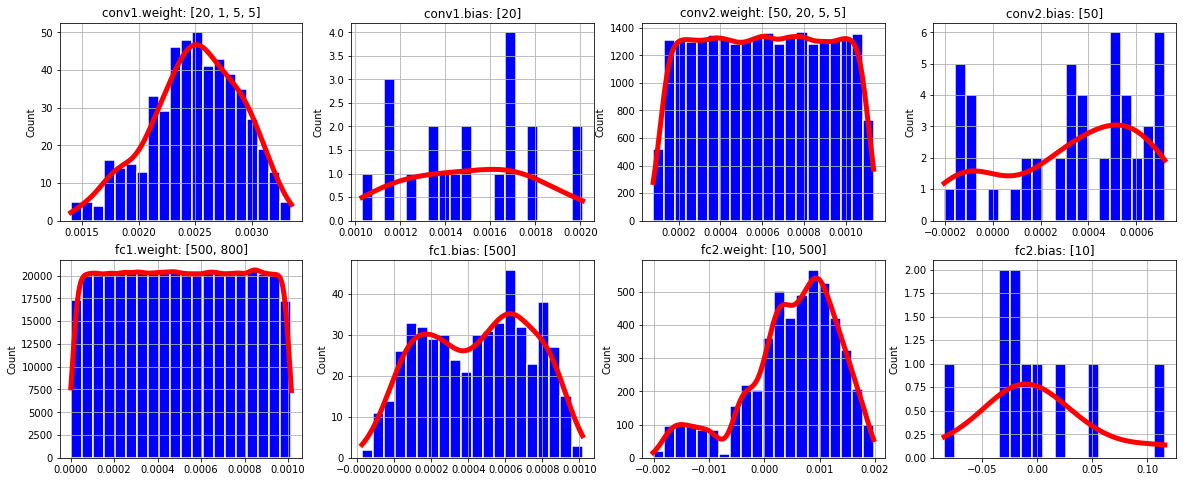

[epoch:   2, batch:    0] loss: 2.301643 	 acc: 0.12
[epoch:   2, batch:   50] loss: 2.299801 	 acc: 0.12
[epoch:   2, batch:  100] loss: 2.293488 	 acc: 0.14
[epoch:   2, batch:  150] loss: 2.277369 	 acc: 0.13
[epoch:   2, batch:  200] loss: 2.236984 	 acc: 0.17


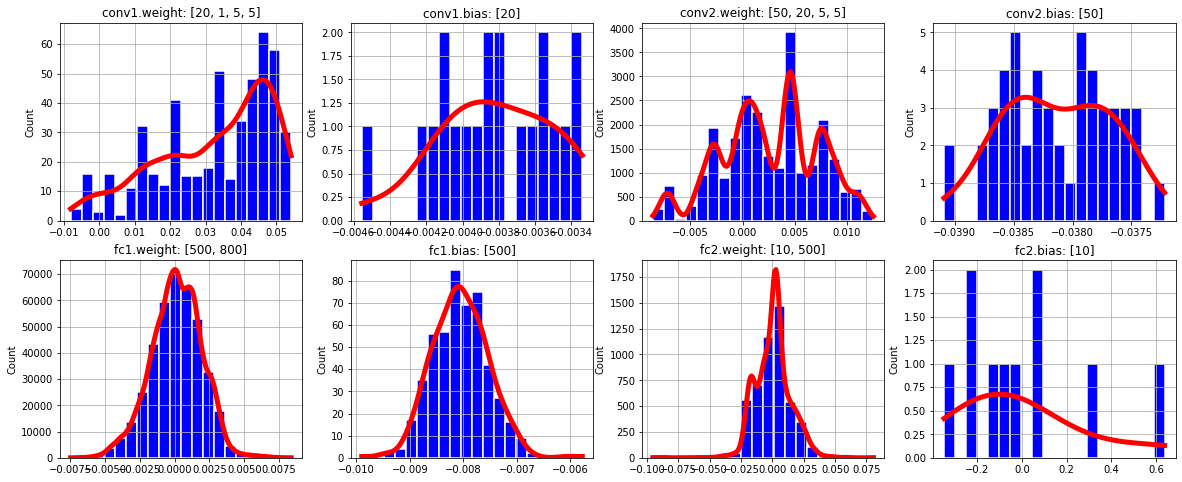

[epoch:   3, batch:    0] loss: 1.961456 	 acc: 0.41
[epoch:   3, batch:   50] loss: 1.433283 	 acc: 0.52
[epoch:   3, batch:  100] loss: 0.796356 	 acc: 0.74
[epoch:   3, batch:  150] loss: 0.583617 	 acc: 0.81
[epoch:   3, batch:  200] loss: 0.457671 	 acc: 0.85


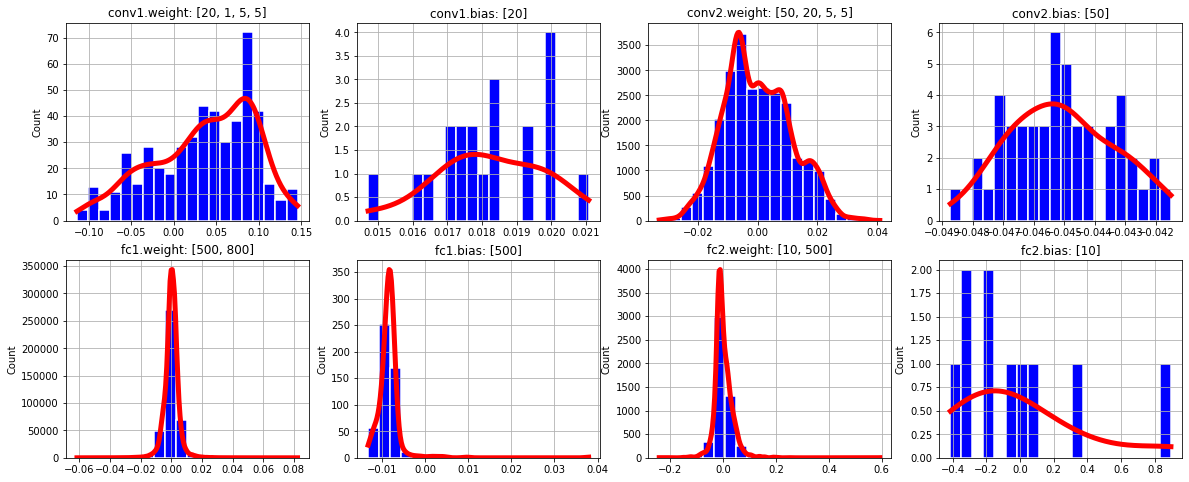

[epoch:   4, batch:    0] loss: 0.294671 	 acc: 0.89
[epoch:   4, batch:   50] loss: 0.298319 	 acc: 0.91
[epoch:   4, batch:  100] loss: 0.234377 	 acc: 0.93
[epoch:   4, batch:  150] loss: 0.195941 	 acc: 0.94
[epoch:   4, batch:  200] loss: 0.164814 	 acc: 0.95


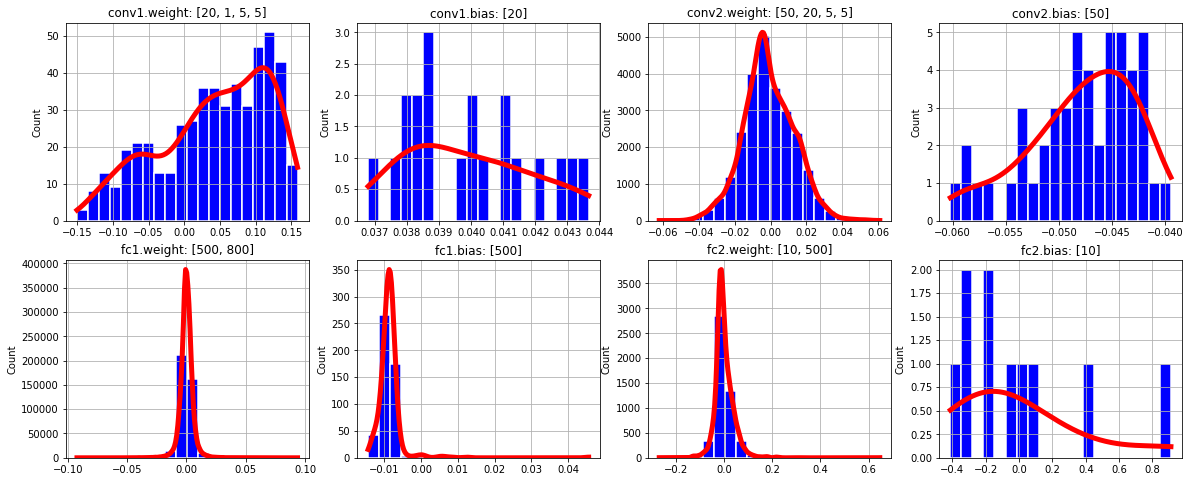

[epoch:   5, batch:    0] loss: 0.175737 	 acc: 0.95
[epoch:   5, batch:   50] loss: 0.139270 	 acc: 0.96
[epoch:   5, batch:  100] loss: 0.119270 	 acc: 0.96
[epoch:   5, batch:  150] loss: 0.121756 	 acc: 0.96
[epoch:   5, batch:  200] loss: 0.105363 	 acc: 0.96


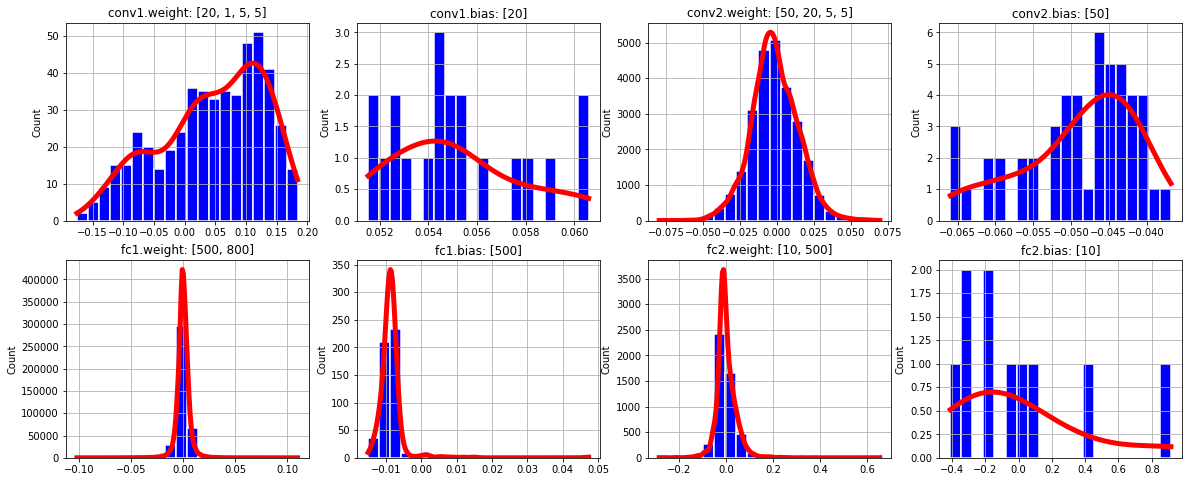

[epoch:   6, batch:    0] loss: 0.148569 	 acc: 0.95
[epoch:   6, batch:   50] loss: 0.095479 	 acc: 0.97
[epoch:   6, batch:  100] loss: 0.081032 	 acc: 0.97
[epoch:   6, batch:  150] loss: 0.085606 	 acc: 0.97
[epoch:   6, batch:  200] loss: 0.076588 	 acc: 0.98


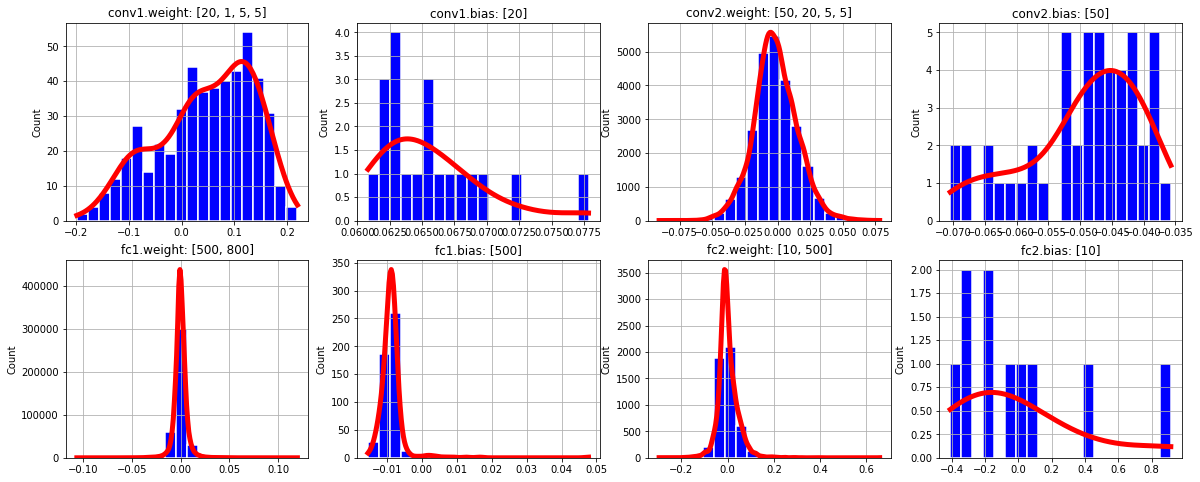

[epoch:   7, batch:    0] loss: 0.064181 	 acc: 0.97
[epoch:   7, batch:   50] loss: 0.072499 	 acc: 0.98
[epoch:   7, batch:  100] loss: 0.064851 	 acc: 0.98
[epoch:   7, batch:  150] loss: 0.070568 	 acc: 0.98
[epoch:   7, batch:  200] loss: 0.068455 	 acc: 0.98


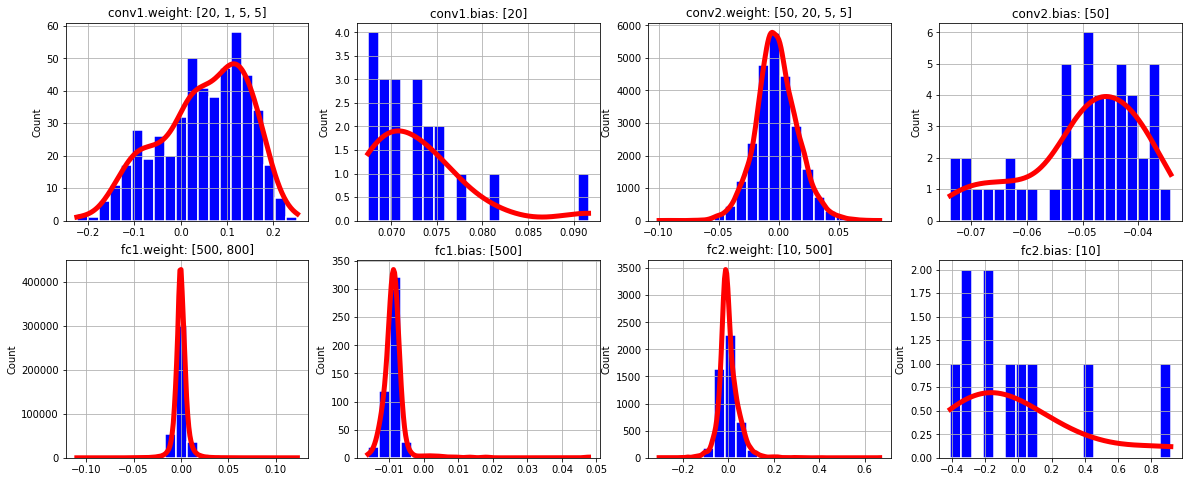

[epoch:   8, batch:    0] loss: 0.029664 	 acc: 0.98
[epoch:   8, batch:   50] loss: 0.060082 	 acc: 0.98
[epoch:   8, batch:  100] loss: 0.058665 	 acc: 0.98
[epoch:   8, batch:  150] loss: 0.051683 	 acc: 0.98
[epoch:   8, batch:  200] loss: 0.056755 	 acc: 0.98


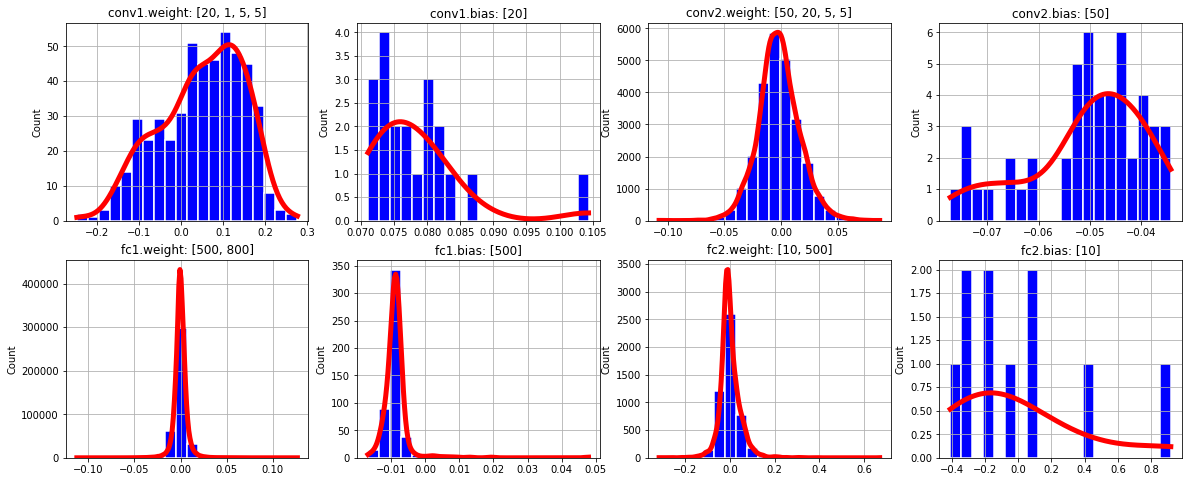

[epoch:   9, batch:    0] loss: 0.075809 	 acc: 0.98
[epoch:   9, batch:   50] loss: 0.047100 	 acc: 0.98
[epoch:   9, batch:  100] loss: 0.053517 	 acc: 0.98
[epoch:   9, batch:  150] loss: 0.052139 	 acc: 0.98
[epoch:   9, batch:  200] loss: 0.046103 	 acc: 0.99


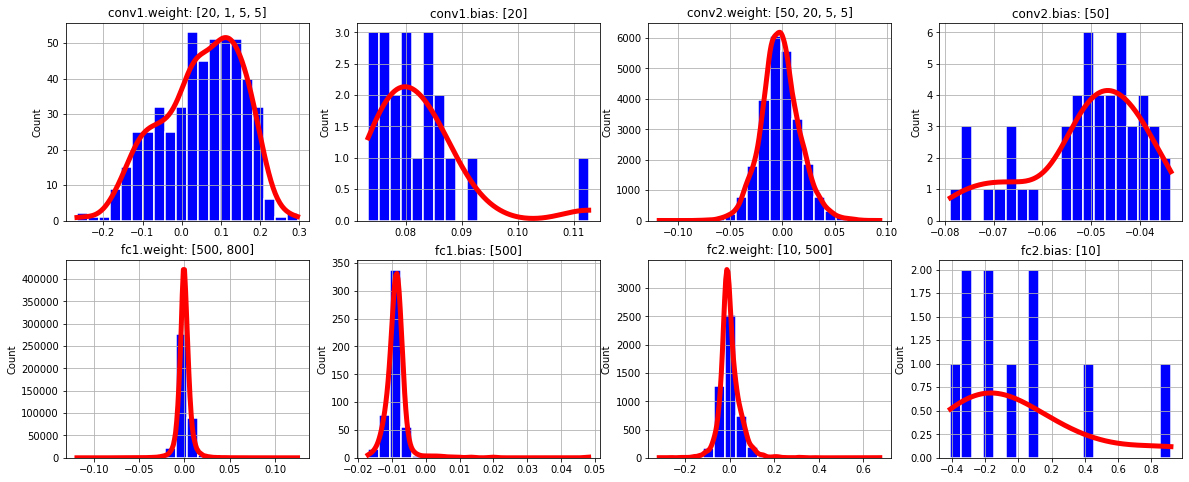

[epoch:  10, batch:    0] loss: 0.030982 	 acc: 0.99
[epoch:  10, batch:   50] loss: 0.041062 	 acc: 0.99
[epoch:  10, batch:  100] loss: 0.045109 	 acc: 0.99
[epoch:  10, batch:  150] loss: 0.043203 	 acc: 0.99
[epoch:  10, batch:  200] loss: 0.038913 	 acc: 0.99


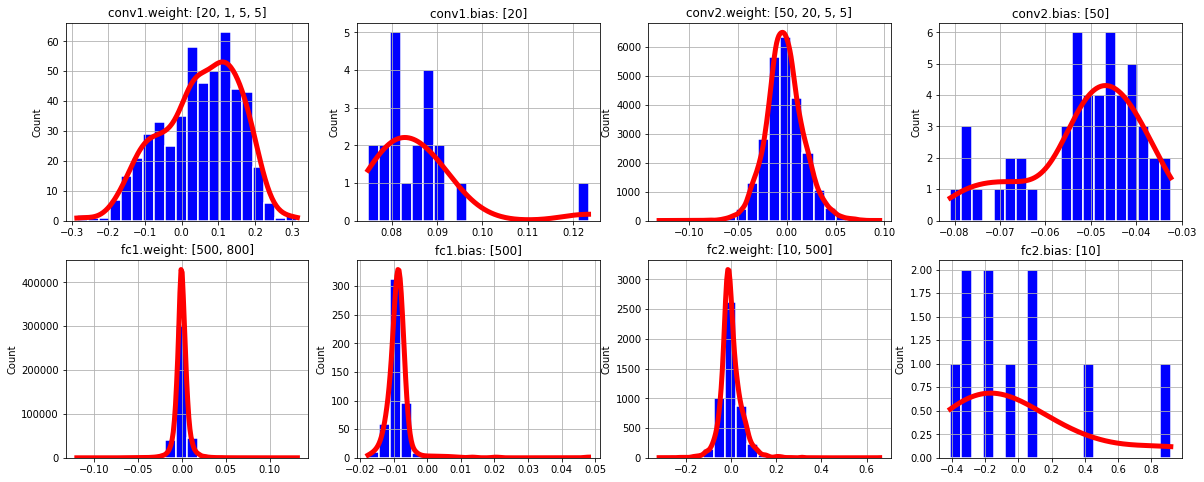

[epoch:  11, batch:    0] loss: 0.034184 	 acc: 0.99
[epoch:  11, batch:   50] loss: 0.033851 	 acc: 0.99
[epoch:  11, batch:  100] loss: 0.042048 	 acc: 0.99
[epoch:  11, batch:  150] loss: 0.035907 	 acc: 0.99
[epoch:  11, batch:  200] loss: 0.036044 	 acc: 0.99


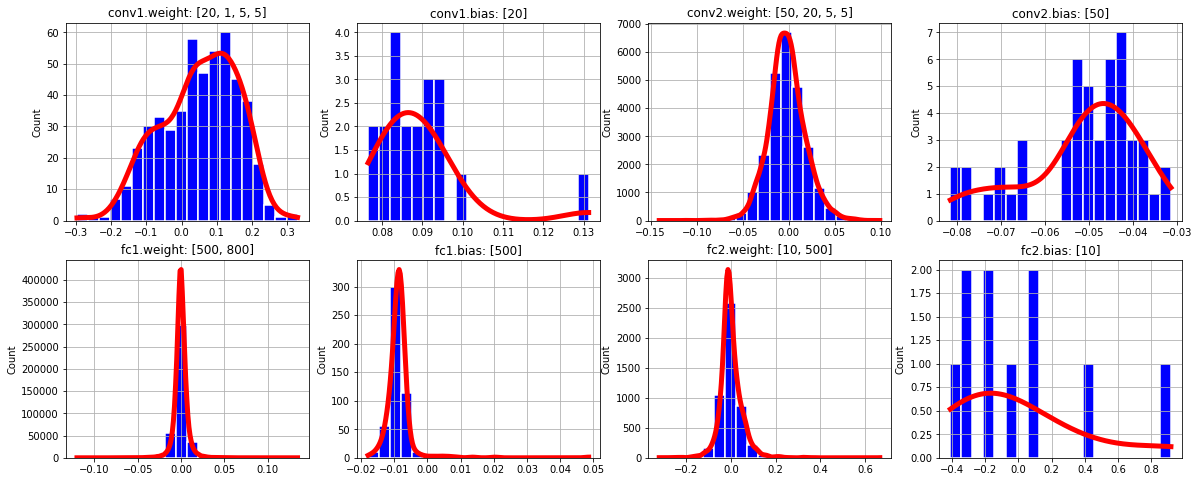

[epoch:  12, batch:    0] loss: 0.017930 	 acc: 1.00
[epoch:  12, batch:   50] loss: 0.032794 	 acc: 0.99
[epoch:  12, batch:  100] loss: 0.036697 	 acc: 0.99
[epoch:  12, batch:  150] loss: 0.030491 	 acc: 0.99
[epoch:  12, batch:  200] loss: 0.029725 	 acc: 0.99


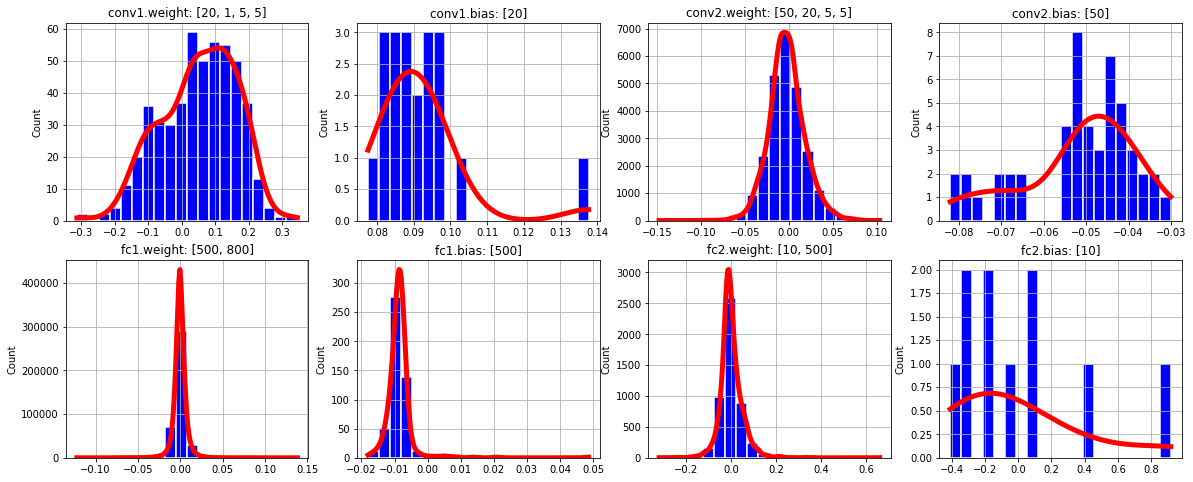

[epoch:  13, batch:    0] loss: 0.013892 	 acc: 1.00
[epoch:  13, batch:   50] loss: 0.027668 	 acc: 0.99
[epoch:  13, batch:  100] loss: 0.029298 	 acc: 0.99
[epoch:  13, batch:  150] loss: 0.034107 	 acc: 0.99
[epoch:  13, batch:  200] loss: 0.029411 	 acc: 0.99


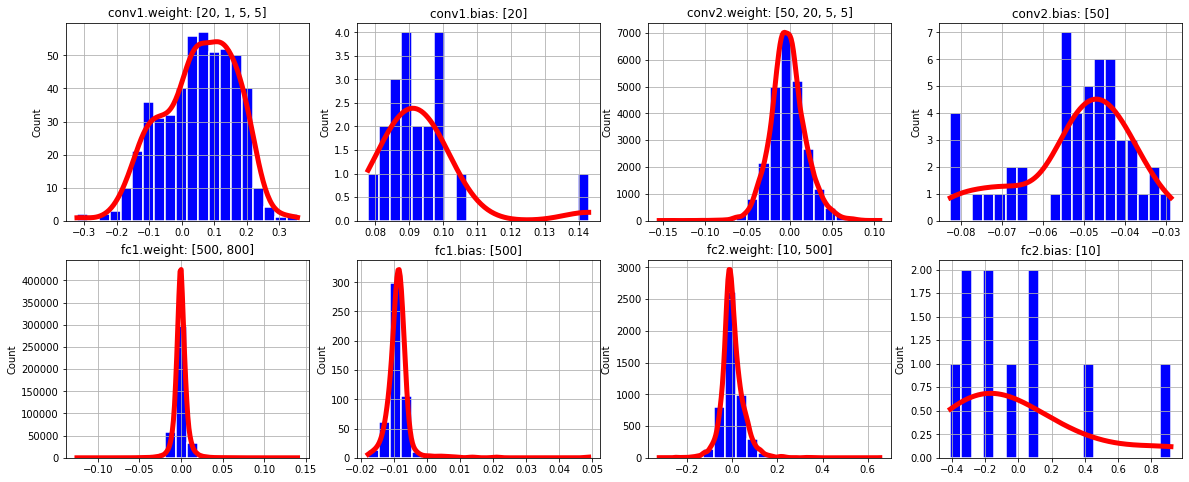

[epoch:  14, batch:    0] loss: 0.011648 	 acc: 1.00
[epoch:  14, batch:   50] loss: 0.023651 	 acc: 0.99
[epoch:  14, batch:  100] loss: 0.029735 	 acc: 0.99
[epoch:  14, batch:  150] loss: 0.027077 	 acc: 0.99
[epoch:  14, batch:  200] loss: 0.027730 	 acc: 0.99


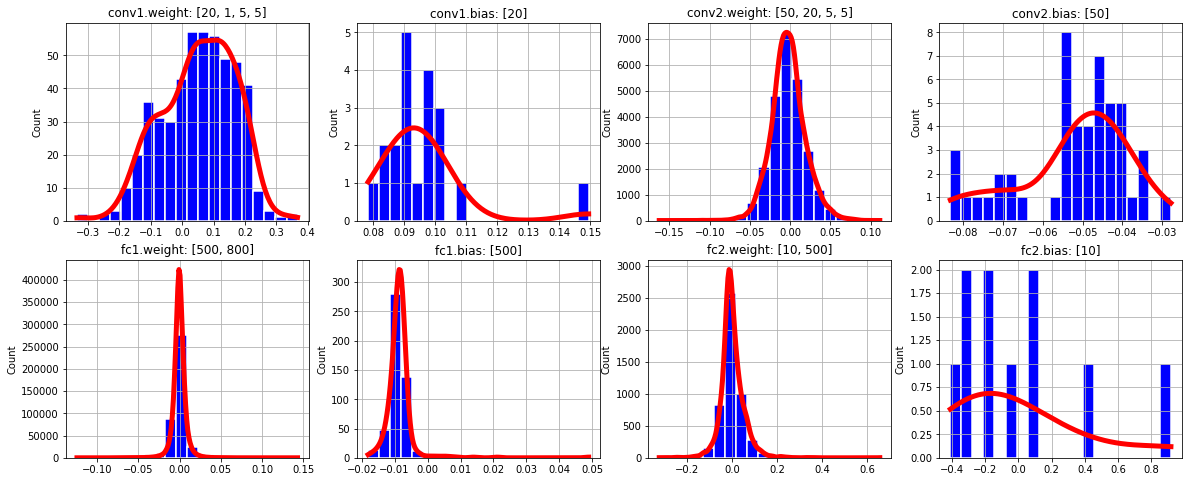

[epoch:  15, batch:    0] loss: 0.017259 	 acc: 1.00
[epoch:  15, batch:   50] loss: 0.025008 	 acc: 0.99
[epoch:  15, batch:  100] loss: 0.021704 	 acc: 0.99
[epoch:  15, batch:  150] loss: 0.023214 	 acc: 0.99
[epoch:  15, batch:  200] loss: 0.022517 	 acc: 0.99


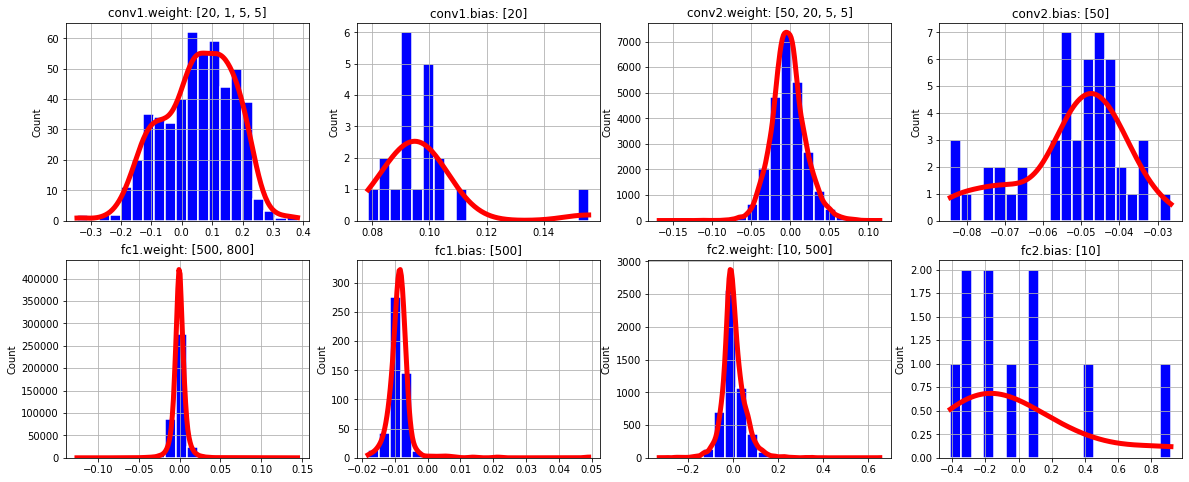

[epoch:  16, batch:    0] loss: 0.029668 	 acc: 0.99
[epoch:  16, batch:   50] loss: 0.022202 	 acc: 0.99
[epoch:  16, batch:  100] loss: 0.020204 	 acc: 0.99
[epoch:  16, batch:  150] loss: 0.024526 	 acc: 0.99
[epoch:  16, batch:  200] loss: 0.022695 	 acc: 0.99


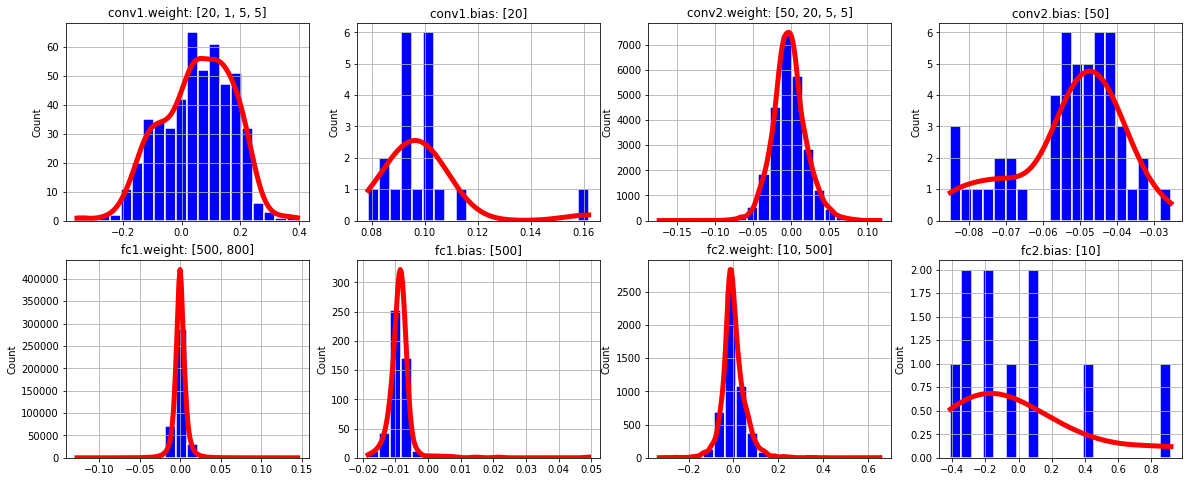

[epoch:  17, batch:    0] loss: 0.050048 	 acc: 0.99
[epoch:  17, batch:   50] loss: 0.017308 	 acc: 1.00
[epoch:  17, batch:  100] loss: 0.018714 	 acc: 0.99
[epoch:  17, batch:  150] loss: 0.020824 	 acc: 0.99
[epoch:  17, batch:  200] loss: 0.020089 	 acc: 0.99


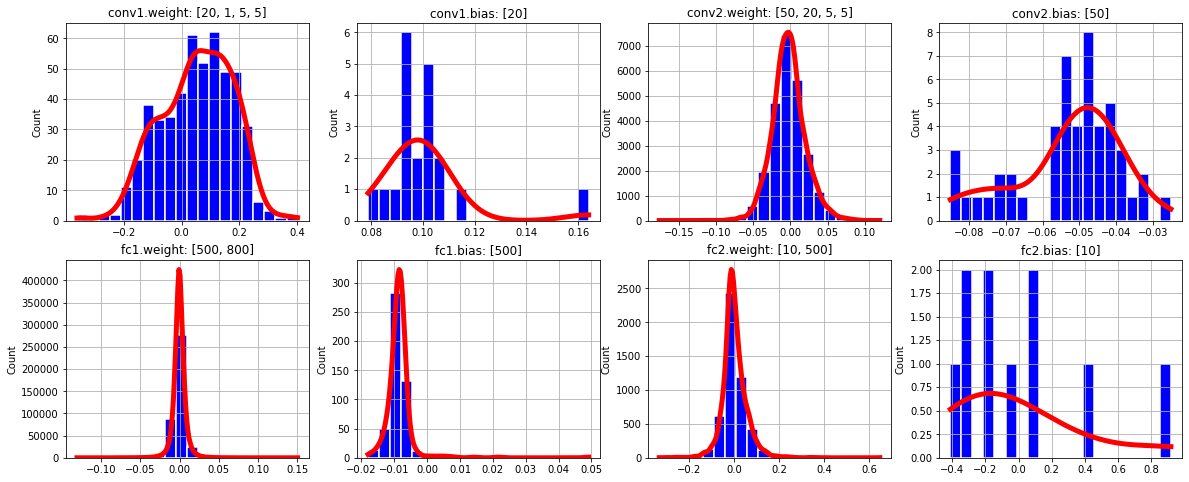

[epoch:  18, batch:    0] loss: 0.039725 	 acc: 1.00
[epoch:  18, batch:   50] loss: 0.014607 	 acc: 1.00
[epoch:  18, batch:  100] loss: 0.018637 	 acc: 0.99
[epoch:  18, batch:  150] loss: 0.020639 	 acc: 0.99
[epoch:  18, batch:  200] loss: 0.016307 	 acc: 0.99


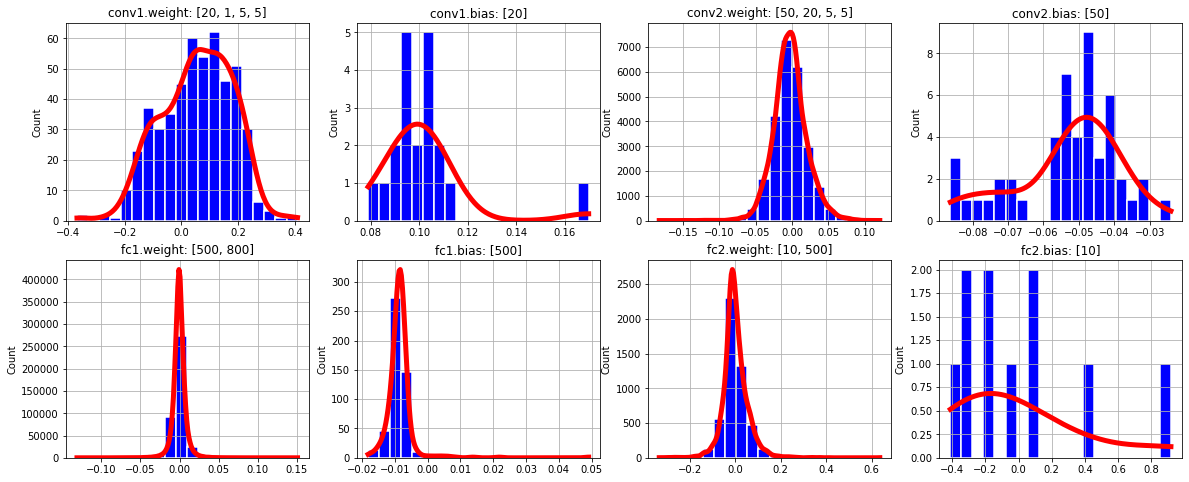

[epoch:  19, batch:    0] loss: 0.005532 	 acc: 1.00
[epoch:  19, batch:   50] loss: 0.014196 	 acc: 1.00
[epoch:  19, batch:  100] loss: 0.018260 	 acc: 0.99
[epoch:  19, batch:  150] loss: 0.016124 	 acc: 1.00
[epoch:  19, batch:  200] loss: 0.016190 	 acc: 1.00


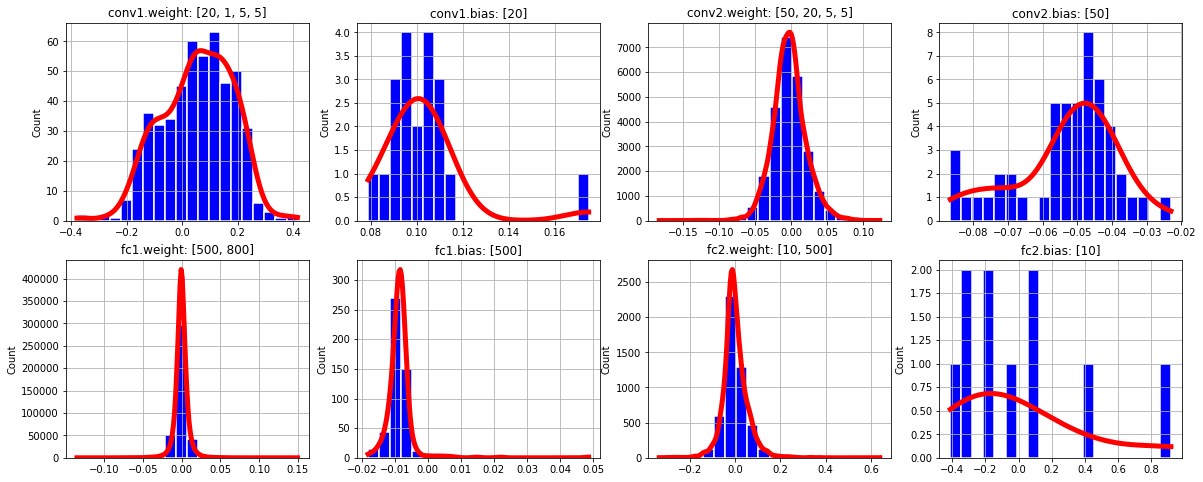

[epoch:  20, batch:    0] loss: 0.015536 	 acc: 1.00
[epoch:  20, batch:   50] loss: 0.013950 	 acc: 1.00
[epoch:  20, batch:  100] loss: 0.012877 	 acc: 1.00
[epoch:  20, batch:  150] loss: 0.012820 	 acc: 1.00
[epoch:  20, batch:  200] loss: 0.014001 	 acc: 1.00


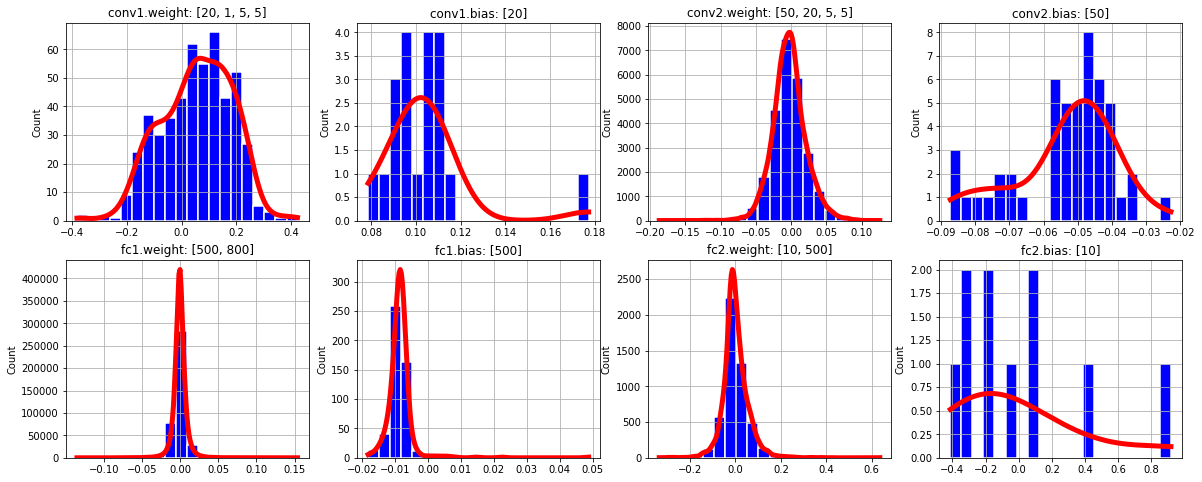

In [8]:
h_epoch, h_acc, h_loss = [], [], []
for epoch in range(1, epochs+1):
    
    running_loss = 0.0
    running_acc = 0.0
    running_count = 0
    epoch_loss = 0
    epoch_acc = 0
    for i, (Y, X) in enumerate(trainloader):
        Y, X = Y.to(device), X.to(device)
        
        X_ = model(Y)
        loss = loss_fn(X_, X)
        running_loss += loss.item()
        optim.zero_grad()
        loss.backward()
        optim.step()
        pred = X_.argmax(axis=1, keepdim=True)
        running_acc += pred.eq(X.view_as(pred)).sum().item()/len(X)
        running_count += 1
        
        # logging
        if i % log_intv == 0:
            epoch_loss = running_loss/running_count
            epoch_acc = running_acc/running_count
            print('[epoch: {:3d}, batch: {:4d}] loss: {:.6f} \t acc: {:.2f}'.format(
                epoch, i, epoch_loss, epoch_acc))
            running_loss = 0.0
            running_acc = 0.0
            running_count = 0
            
        # kalman filtering
        model_mu, model_var, P_mu, P_var = kalman_filter(
            model, learning_rate, 
            model_mu, model_var, P_mu, P_var,
            std_mu, std_mu_, std_var, std_var_
        )
    h_epoch.append(epoch)
    h_acc.append(epoch_acc)
    h_loss.append(epoch_loss)
    plot_density(model, bins=20)

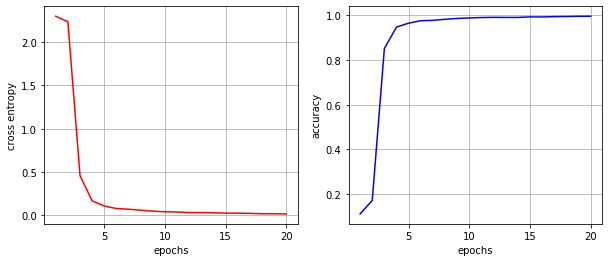

In [9]:
plot_training(h_epoch, h_acc, h_loss)

# validate training

In [10]:
validate(model, testloader, device)

0.9897

# draw model

In [11]:
drawn_weights = draw_weights(model_mu, model_var, device)
drawn_model = CNN().to(device)
drawn_model.load_state_dict(drawn_weights)

<All keys matched successfully>

In [12]:
validate(drawn_model, testloader, device)

0.9899